# LZW algorithm

## Inrodution

The Lempel-Ziv-Welch (LZW) algorithm is a lossless data compression algorithm that was created by Abraham Lempel, Jacob Ziv, and Terry Welch in 1984. It works by using a dictionary-based approach, where the most frequently occurring substrings in the input data are replaced with variable-length codes, thus reducing the amount of space needed to store the data.

Now let's discuss the code in more detail.

## Code

The code imports the time, matplotlib.pyplot, and os modules for timing, plotting, and file manipulation, respectively.

In [1]:
import time
import matplotlib.pyplot as plt
import os

The LZW class has several methods for performing the different stages of the LZW algorithm. Function read_file() reads a file and stores its contents as a string in the text attribute of the object. Function create_start_dctnr() creates the starting dictionary for the LZW algorithm, which consists of all unique characters in the input text. Function encode() performs the encoding process, while function decode() performs the decoding process. Function get_reversed_dict() returns a reversed code dictionary (we need for decoding).

In [2]:
class LZW:
    '''
    Class of LZW algorithm.
    '''
    def __init__(self):
        self.text = None
        self.dctnr = None

    def read_file(self, filename):
        '''
        Reads file and returns as string.
        '''
        with open(filename, 'r', encoding='utf-8') as old_f:
            content = old_f.read()
        self.text = content

    def create_start_dctnr(self):
        '''
        Creates starting dictionary for LZW algo.
        '''
        chars = list(set(self.text))
        self.dctnr = {chars[_i]: _i for _i in range(len(chars))}

    def encode(self, filename=None):
        '''
        Encode file and write it into file with name {filename}.
        '''
        self.create_start_dctnr()
        code = []
        current_str = self.text[0]
        for ind, char in enumerate(self.text):
            try:
                current_str += self.text[ind+1]
            except IndexError:
                code.append(str(self.dctnr[current_str]))
                break
            if current_str in self.dctnr:
                continue
            else:
                self.dctnr[current_str] = len(self.dctnr)
                code.append(str(self.dctnr[current_str[:-1]]))
                current_str = self.text[ind+1]

        if filename:
            with open(filename, 'w', encoding='utf-8') as new_f:
                new_f.write(','.join(code))

    def decode(self, encoding, filename):
        '''
        Decode text you encoded.
        Write decoded text into file with name {filename3};
        encoding - dictionary where code is the key and character is the value;
        '''
        encoded_text = self.text.split(',')
        decoded_text = ''
        for code in encoded_text:
            decoded_text += encoding[int(code)]

        with open(filename, 'w', encoding='utf-8') as new_de_f:
            new_de_f.write(decoded_text)

    def get_reversed_dict(self):
        '''
        Return reversed code dictionary.
        '''
        if self.dctnr:
            return dict([(_x3[1], _x3[0]) for _x3 in self.dctnr.items()])

The encode_speed_test_lzw() function tests the speed of the LZW encoding process for several input files. It takes a verbose argument that, when set to True, writes the encoded text into a file. The function returns the reversed code dictionaries for each input file.

In [3]:
def encode_speed_test_lzw(lzw: LZW, verbose=False):
    '''
    Test speed of encoding Hufmann using algorithm.
    Set verbose=True if you want to write encoded text into file.
    '''
    file_names = ['1', '2', '3', '4', '5', '6']
    length = []
    times = []
    codes = []
    for file_name in file_names:
        lzw.read_file(file_name+'.txt')
        start = time.time()
        if verbose:
            lzw.encode(file_name+'_encoded_lzw'+'.txt')
        else:
            lzw.encode()
        finish = time.time()
        total = finish - start
        length.append(len(lzw.text))
        times.append(total)
        codes.append(lzw.get_reversed_dict())
    #Plotting
    plt.plot(length[:-2], times[:-2], marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    if verbose:
        plt.title('LZW. Encoding without very large data. Writing in file.')
    else:
        plt.title('LZW. Encoding without very large data. No writing in file.')
    plt.show()
    plt.plot(length, times, marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    if verbose:
        plt.title('LZW. Encoding with very large data. Writing in file.')
    else:
        plt.title('LZW. Encoding with very large data. No writing in file.')
    plt.show()
    return codes

The decode_speed_test_lzw() function tests the speed of the LZW decoding process for several encoded files. It takes as input the LZW object and the reversed code dictionaries generated by the encode_speed_test_lzw() function.

In [4]:
def decode_speed_test_lzw(lzw: LZW, codes):
    '''
    Test speed of encoding Hufmann using algorithm.
    Set verbose=True if you want to write encoded text into file.
    '''
    file_names = ['1', '2', '3', '4', '5', '6']
    length = []
    times = []
    for ind, file_name in enumerate(file_names):
        lzw.read_file(file_name+'_encoded_lzw'+'.txt')
        start = time.time()
        lzw.decode(codes[ind], file_name+'_decoded_lzw'+'.txt')
        finish = time.time()
        total = finish - start
        length.append(len(lzw.text))
        times.append(total)
    #Plotting
    plt.plot(length[:-2], times[:-2], marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    plt.title('LZW. Decoding without very large data.')
    plt.show()
    plt.plot(length, times, marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    plt.title('LZW. Decoding with very large data.')
    plt.show()

The compression_value_lzw() function calculates the compression rate achieved by the LZW algorithm for several input files. Compression rate is calculated as the 1 - (ratio of the size of the compressed file to the size of the original file (sizes are in bytes)) and represented in per cents.

In [5]:
def compression_value_lzw():
    '''
    Calculates how strong text was compressed.
    '''
    file_names = ['1', '2', '3', '4', '5', '6']
    for file_name in file_names:
        print(f'Compression rate with LZW algorithm for file {file_name}.txt equals to:')
        with open(file_name+'_encoded_lzw.txt', 'r', encoding='utf-8') as encoded_f:
            orig_size = os.path.getsize(file_name+".txt")
            comp_size = len(encoded_f.read().split(","))*2 #comp_size is multiplied by 2 because integers weigh two bytes
            print(f'{round((1 -  comp_size / orig_size)*100, 2)}%\n')

## Test

First, let's initialize our algorithm:

In [6]:
_lzw = LZW()

Now we test speed without verbose:

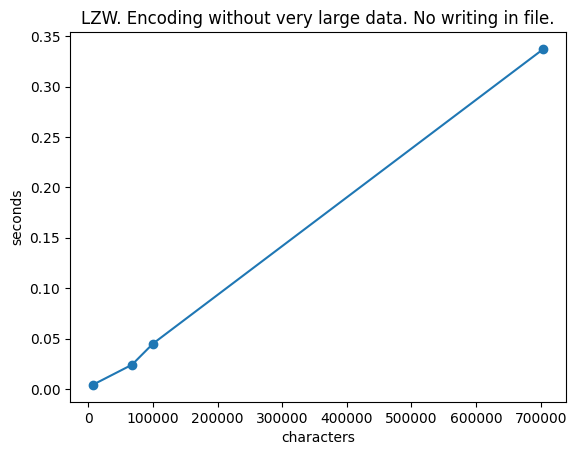

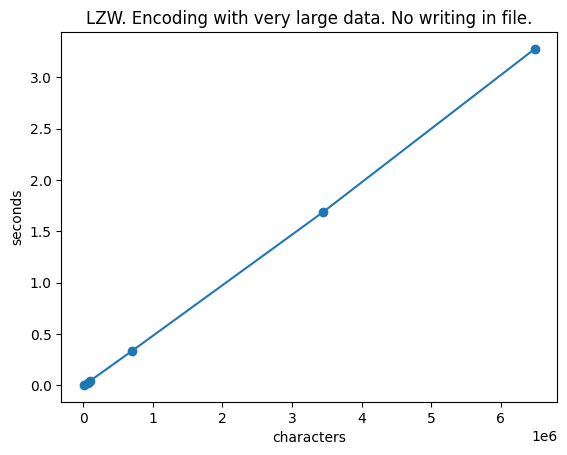

In [7]:
c_t1 = encode_speed_test_lzw(LZW())

Then we test speed with verbose=True:

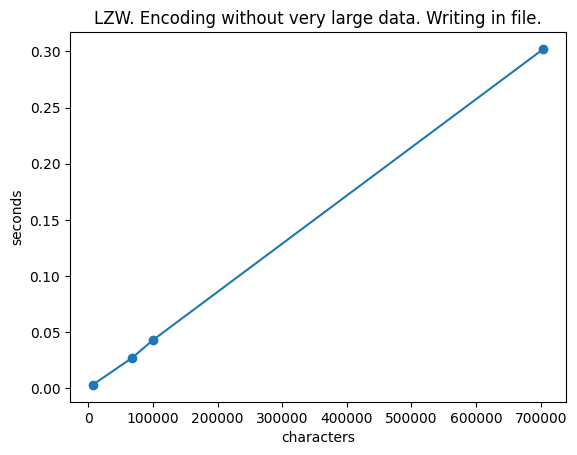

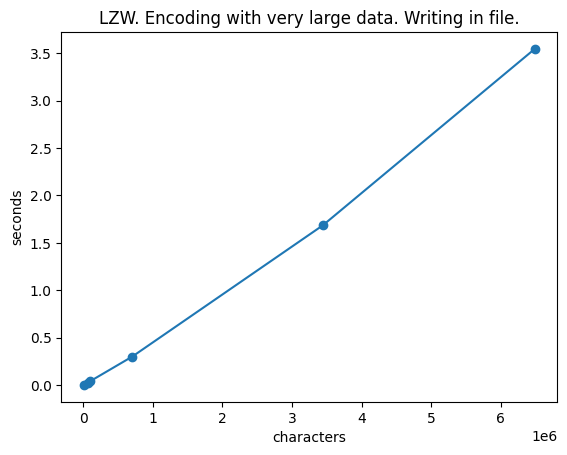

In [8]:
c_t2 = encode_speed_test_lzw(LZW(), verbose=True)

Testing decoding speed:

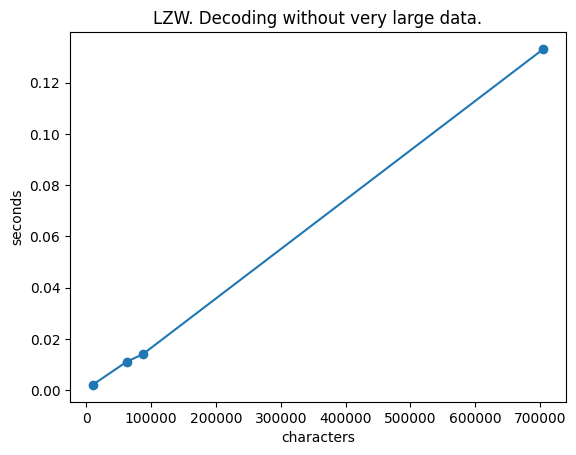

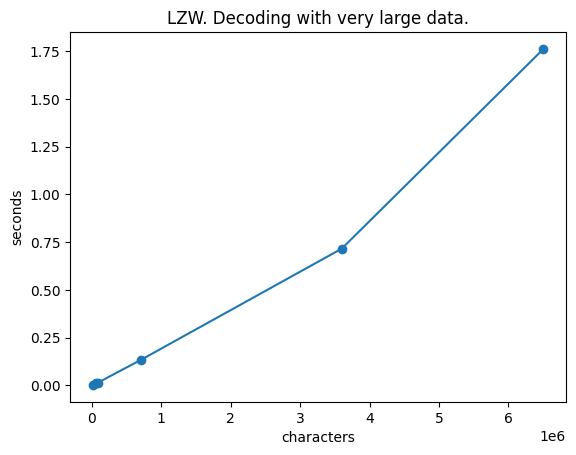

In [9]:
decode_speed_test_lzw(_lzw, c_t2)

And at the end let's get compression rates:

In [10]:
compression_value_lzw()

Compression rate with LZW algorithm for file 1.txt equals to:
28.16%

Compression rate with LZW algorithm for file 2.txt equals to:
61.42%

Compression rate with LZW algorithm for file 3.txt equals to:
64.57%

Compression rate with LZW algorithm for file 4.txt equals to:
65.06%

Compression rate with LZW algorithm for file 5.txt equals to:
67.86%

Compression rate with LZW algorithm for file 6.txt equals to:
69.99%



## Conclusion

After testing the compression_value function on six different files, we can see that the compression rate varies widely, ranging from 28.16% to 69.99%. This is due to the nature of the LZW algorithm, which works best on data that contains repeated patterns or sequences. Files that have more redundancy, such as text files with a lot of repeated words or phrases, are more likely to achieve a higher compression rate than files with more unique or random data.

One feature of LZW that we can observe from these results is that the compression rate tends to increase with the size of the file. This is because larger files are more likely to contain repeated patterns or sequences, which the LZW algorithm can identify and encode more efficiently.

Regarding the efficiency of the LZW algorithm, it has a time complexity of O(nlogn). Therefore, for smaller data, the algorithm can run very quickly. However, for larger data, the running time can increases linearly.

Overall, the LZW algorithm can be a powerful tool for compressing data, especially for files with high redundancy. However, the compression rate can vary widely depending on the nature of the data being compressed, and it is important to test the algorithm on a variety of data types to determine its effectiveness in different contexts.